In [1]:
import json
import numpy as np
import pandas as pd

In [2]:
df_PA = pd.read_csv("coffee_PA.csv")
df_PA

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,19104,39.954573,-75.194894,3.0,56,1,"{'Alcohol': ""u'none'"", 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
2,2dlQX5sP9X6Dlm1MmNOlSw,ReAnimator Coffee,1523 E Susquehanna Ave,Philadelphia,PA,19125,39.976456,-75.127025,4.0,105,1,"{'BusinessParking': ""{'garage': False, 'street...","Food, Coffee & Tea","{'Monday': '0:0-0:0', 'Tuesday': '8:0-15:0', '..."
3,bTve2mwLk5Zc01vRKqc2KQ,Red Hook Coffee & Tea,765 S 4th St,Philadelphia,PA,19147,39.938552,-75.149636,4.5,183,1,"{'BikeParking': 'True', 'OutdoorSeating': 'Tru...","Restaurants, Breakfast & Brunch, Vegan, Bagels...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."
4,aNXw3PkXVt8ANwLyCfcmpg,McDonald's,2333 Welsh Rd,Lansdale,PA,19446,40.263706,-75.317916,1.5,17,1,"{'WiFi': ""u'free'"", 'GoodForKids': 'True', 'Bu...","Restaurants, Fast Food, Burgers, Food, Coffee ...","{'Monday': '6:0-23:0', 'Tuesday': '6:0-23:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,q0tB0ch5cFQQBSp5nUXRCQ,Wawa,10901 Bustleton Ave,Philadelphia,PA,19116,40.111571,-75.023489,3.5,12,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Food, Convenience Stores, Sandwiches, Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
1212,VFrmNGmPK-8UsDAXlxX-CQ,Starbucks,270 Easton Rd,Warrington,PA,18976,40.220144,-75.140597,3.0,32,1,"{'BusinessParking': ""{'garage': False, 'street...","Food, Coffee & Tea","{'Monday': '0:0-0:0', 'Tuesday': '5:30-20:30',..."
1213,tpo4IsLJDU5agU2TjLO-jw,Brakeman's Cafe,56 S Washington St,Boyertown,PA,19512,40.331233,-75.635736,4.5,31,1,"{'OutdoorSeating': 'True', 'HasTV': 'False', '...","Breakfast & Brunch, Sandwiches, Coffee & Tea, ...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-14:0', '..."
1214,pM1M2A14mNXz48KCcQtz2w,Starbucks,4140 Woodland Ave,Philadelphia,PA,19104,39.946809,-75.206722,3.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Coffee & Tea","{'Monday': '0:0-0:0', 'Tuesday': '7:0-23:0', '..."


In [3]:


size = 1000000
reviews = pd.read_json('review.json', lines=True, 
                    dtype={'review_id':str,'user_id':str,
                           'business_id':str,'stars':int,
                           'date':str,'text':str,'useful':int,
                           'funny':int,'cool':int},
                    chunksize=size)



In [4]:
chunk_list = []
for chunk in reviews:
    # Merge reviews.json and fastfood business file based on business_id
    chunk_merged = pd.merge(df_PA, chunk, on='business_id', how='inner')
    # Show feedback on progress
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunk_list.append(chunk_merged)

12116 out of 1,000,000 related reviews
10993 out of 1,000,000 related reviews
11285 out of 1,000,000 related reviews
11139 out of 1,000,000 related reviews
9448 out of 1,000,000 related reviews
11859 out of 1,000,000 related reviews
18190 out of 1,000,000 related reviews


In [5]:
df_PA = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)
df_PA

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",BXQcBN0iAi1lAUxibGLFzA,6_SpY41LIHZuIaiDs5FMKA,4,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",uduvUCvi9w3T2bSGivCfXg,tCXElwhzekJEH6QJe3xs7Q,4,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",a0vwPOqDXXZuJkbBW2356g,WqfKtI-aGMmvbA9pPUxNQQ,5,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",MKNp_CdR2k2202-c8GN5Dw,3-1va0IQfK-9tUMzfHWfTA,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",D1GisLDPe84Rrk_R4X2brQ,EouCKoDfzaVG0klEgdDvCQ,4,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85025,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,3.0,11,...,"Restaurants, Sandwiches, Convenience Stores, C...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",xNV1VhxU6Zh5FRkHH1OPMg,P9FQMSwYQCy-k7fkRJTltQ,4,0,0,0,This place is great! This is one main Wawa I g...,2019-05-18 17:10:48
85026,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,3.0,11,...,"Restaurants, Sandwiches, Convenience Stores, C...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",_N1Nqjtb5G8ULlM4U8h33A,k2kYJSZWIiSW_79sFGpz9Q,3,0,0,0,I really only stopped for gas. It was super cr...,2019-12-23 01:12:54
85027,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,3.0,11,...,"Restaurants, Sandwiches, Convenience Stores, C...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",XWE4ej9ObmODvaFE1rxJ5w,KCeHOGhibdbYSF2lLehZWA,5,0,0,0,I have patronized this location of WAWA for qu...,2019-08-04 19:41:03
85028,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,3.0,11,...,"Restaurants, Sandwiches, Convenience Stores, C...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",wnzZIoY1edBfhGwh0t1D8g,6pbNMgTnSYrtPHDN07IXwA,3,16,5,10,[789]\n\nThis Wawa location is located on busy...,2018-09-11 12:43:43


In [6]:
df_PA.to_csv('coffee_review_merge.csv',index=False)

In [7]:
df_tp = pd.read_csv("Trips_by_Distance.csv")
df_tp

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,2019/01/01,NaN,NaN,NaN,NaN,77433867.0,248733553.0,8.977844e+08,241667151.0,...,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,2019/01/02,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1.139452e+09,291276735.0,...,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,2019/01/03,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1.162753e+09,296375014.0,...,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,2019/01/04,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1.181954e+09,293159631.0,...,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,2019/01/05,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1.180477e+09,295459014.0,...,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560749,State,2023/10/07,10.0,DE,NaN,NaN,193623.0,780141.0,4.222025e+06,1105040.0,...,693535.0,652105.0,223670.0,77334.0,26266.0,2843.0,2098.0,10-00000-20231007,40,10
5560750,State,2023/10/07,23.0,ME,NaN,NaN,265741.0,1078471.0,6.422140e+06,1475329.0,...,1058192.0,1117974.0,404352.0,119612.0,32754.0,2194.0,2987.0,23-00000-20231007,40,10
5560751,State,2023/10/07,40.0,OK,NaN,NaN,746731.0,3210240.0,1.694916e+07,4344331.0,...,2591151.0,2720144.0,952152.0,433461.0,201816.0,23013.0,7480.0,40-00000-20231007,40,10
5560752,State,2023/10/07,55.0,WI,NaN,NaN,1107713.0,4714721.0,2.820940e+07,7574840.0,...,4402765.0,4301354.0,1513604.0,611522.0,276734.0,30407.0,16301.0,55-00000-20231007,40,10


In [8]:
df_PA.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",BXQcBN0iAi1lAUxibGLFzA,6_SpY41LIHZuIaiDs5FMKA,4,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",uduvUCvi9w3T2bSGivCfXg,tCXElwhzekJEH6QJe3xs7Q,4,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",a0vwPOqDXXZuJkbBW2356g,WqfKtI-aGMmvbA9pPUxNQQ,5,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",MKNp_CdR2k2202-c8GN5Dw,3-1va0IQfK-9tUMzfHWfTA,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",D1GisLDPe84Rrk_R4X2brQ,EouCKoDfzaVG0klEgdDvCQ,4,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35


In [9]:
from datetime import datetime

# Assuming you have loaded both datasets into Python as dataframes named Trips_by_Distance and coffee_review_merge

# Convert Date column to datetime type in both datasets
df_tp['Date'] = pd.to_datetime(df_tp['Date'])
df_PA['date'] = pd.to_datetime(df_PA['date'])


In [15]:
# Extract the year from the Date column
df_tp['YearMonth'] = df_tp['Date'].dt.to_period('M')
df_PA['YearMonth'] = df_PA['date'].dt.to_period('M')

# Aggregate the data to get the total number of trips and reviews per year
trips_by_year = df_tp.groupby('YearMonth')['Number of Trips'].sum().reset_index()
reviews_by_year = df_PA.groupby('YearMonth')['review_count'].sum().reset_index()

# Merge the two datasets based on the Year
merged_data = pd.merge(trips_by_year, reviews_by_year, on='YearMonth', how='outer')

# Calculate correlation
correlation = merged_data['Number of Trips'].corr(merged_data['review_count'])

# Print correlation
print(f"Correlation between Number of Trips and Number of Reviews: {correlation}")

Correlation between Number of Trips and Number of Reviews: 0.7081254643300499


In [16]:
merged_data

,YearMonth,Number of Trips,review_count
0,2019-01,1.057457e+11,528215.0
1,2019-02,9.648883e+10,463593.0
2,2019-03,1.215115e+11,544966.0
3,2019-04,1.302183e+11,603891.0
4,2019-05,1.316002e+11,492639.0
...,...,...,...
210,2018-08,NaN,561492.0
211,2018-09,NaN,620733.0
212,2018-10,NaN,644066.0
213,2018-11,NaN,562890.0


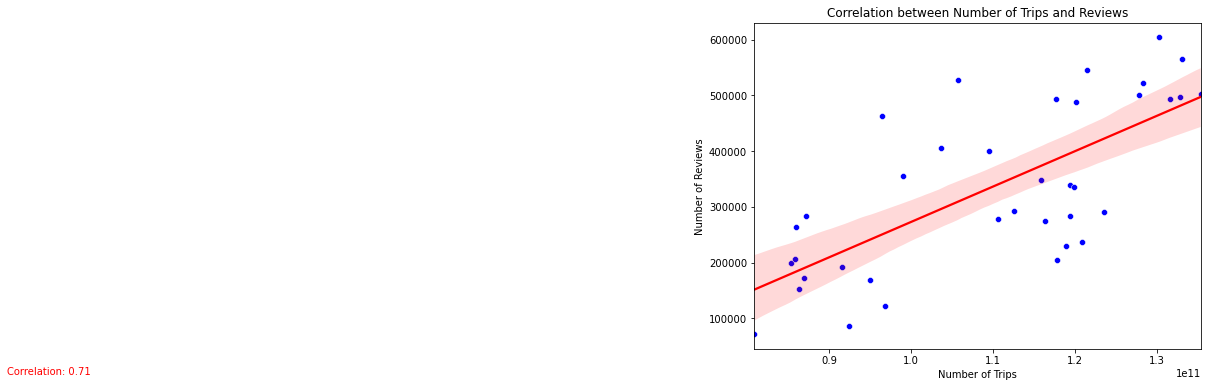

In [17]:
#       Correlation between #of trips and #of reviews

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the correlation value from the previous Python code

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Number of Trips', y='review_count', data=merged_data, color='blue')
sns.regplot(x='Number of Trips', y='review_count', data=merged_data, scatter=False, color='red')

# Show the correlation value on the plot
plt.text(50, 60, f"Correlation: {correlation:.2f}", color='red', ha='right')

# Set labels and title
plt.xlabel('Number of Trips')
plt.ylabel('Number of Reviews')
plt.title('Correlation between Number of Trips and Reviews')

# Show the plot
plt.show()